## Setup 

In [1]:
# Imports
import os
import sys
import pandas as pd
import seaborn as sb

# Custom Imports
sys.path.insert(0, '../../')
import stats_toolbox as st
from stats_toolbox.utils.data_loaders import load_fem_preg_2002

# Graphics setup 
%pylab inline --no-import-all
sb.set_context('notebook', font_scale=1.5)

Populating the interactive namespace from numpy and matplotlib


## Load Data

In [2]:
from stats_toolbox.utils.data_loaders import load_fem_preg_2002
# Load and Clean Data
df = load_fem_preg_2002('../data')
full_term = df[df['prglngth'] >= 37]
weights = df.birthwgt_kg.dropna()

## Constructing Histograms

Any pandas series object of list like object can be converted in to ahistogram to map the values of that sequece to their frequencies

In [23]:
H = st.Hist(df.totalwgt_lb, label='Birth Weight')

Getting frequencies for values

In [27]:
H.freq(8)

265

or equivilantly

In [28]:
H[8]

265

## Visualising

When plotting, the following keyword arguments can be passed to configure the plot once it has been generated:

* `title`, `xlabel`, `ylabel`, `xscale`, `yscale`, `xticks`, `yticks`, `axis`, `xlim`, `ylim`, `legend`

These all call the appropriate method from pyplot to alter the plot with the values passed in. e.g.

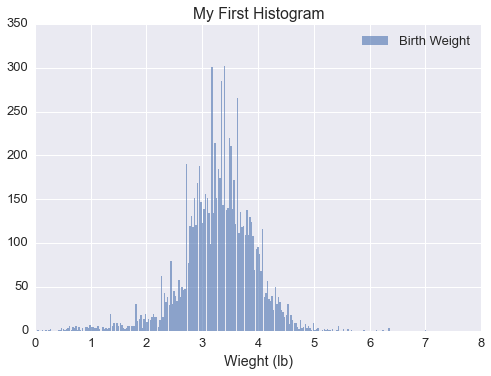

In [4]:
H.plot(title='My First Histogram', xlabel='Wieght (lb)', legend=True)

By default the plotting method used is pyplot.bar to plot each data points frequency. 

Note that the apparent pattern in the bars above is due to the plot rendering itself (lots of bars very close together), not the underlying data. Zooming in to the plot shows this to be the case. 

To be able to parse in the number of bins, we need to use plt.hist instead of plt.bar. to do this pass in `mpl_hist=True`. Additional keywords are then parsed to pyplot.hist instead of pyplot.bar

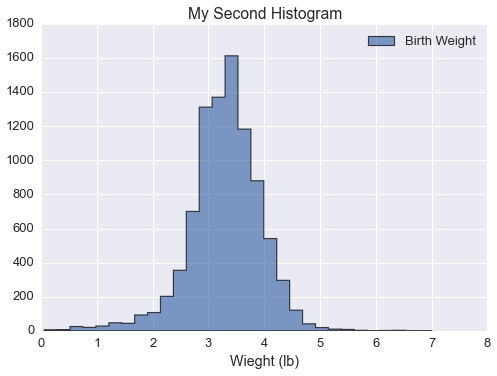

In [5]:
H.plot(mpl_hist=True, bins=30, histtype='stepfilled', alpha=0.7, 
      title='My Second Histogram', xlabel='Wieght (lb)', legend=True)

multiple plots are possible with the `multiplot` command that plots multiple objects on a single axes

In [11]:
hist1 = st.Hist(np.repeat(np.arange(0,20,2), np.arange(20,0,-2)), label='Hist 1')
hist2 = st.Hist(np.repeat(np.arange(10,30,2), np.arange(20,0,-2)), label='Hist 2')

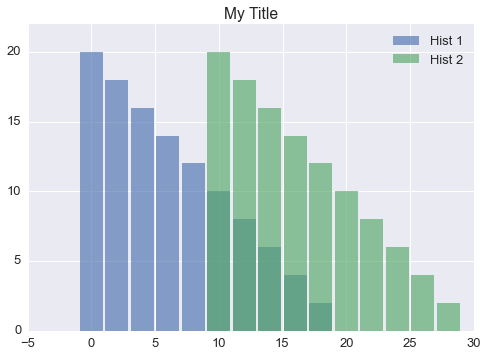

In [12]:
f = st.multiplot([hist1, hist2], title='My Title', ylim=(0,22))

specific plotting parameters can be passed via the `plt_kwds` argument

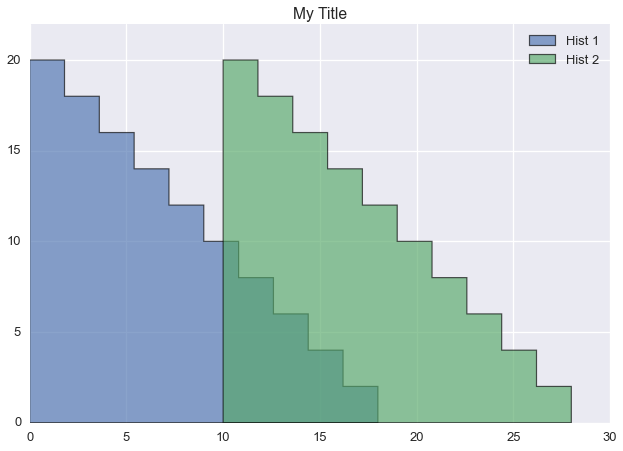

In [5]:
f = st.multiplot([hist1, hist2], plt_kwds={'mpl_hist': True, 'bins': 10}, 
                 title='My Title', ylim=(0,22))

## Methods 

### Explorative / summary

In [15]:
# Find the n largest/smallest values and thier frequencies 
top20 = H.largest(20)
bottom5 = H.smallest(5)

# Find the most/least frequent values
top5feq = H.most_freq(5)
bottom5freq = H.least_freq(5)

# Calculate stats
print(H.mean(), H.var(), H.std())

3.29563094335 0.408008333822 0.6387553004258345


### Manipulation

In [40]:
hist1 = st.Hist(np.repeat(np.arange(0,20,1), np.arange(20,0,-1)))

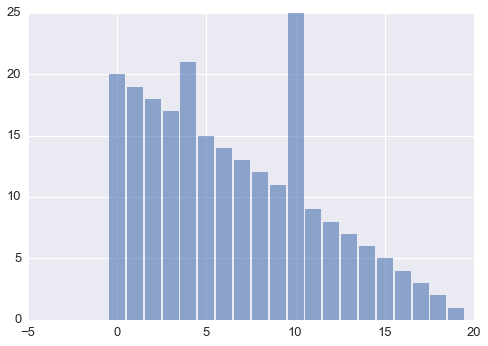

In [41]:
# Increment or multiply, changes are made inplace
hist1.incr(4, 5)
hist1.mult(10, 2.5)
hist1.plot()

In [42]:
# Histogram Arithmatic
hist1 = st.Hist(np.repeat(np.arange(0,20,1), np.arange(20,0,-1)))
hist2 = st.Hist(np.repeat(np.arange(10,30,1), np.arange(20,0,-1)))

In [43]:
hist3 = hist1 + hist2

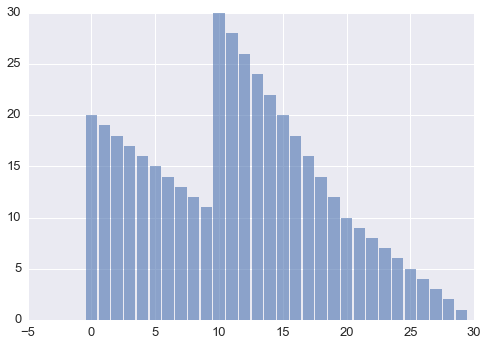

In [44]:
hist3.plot()

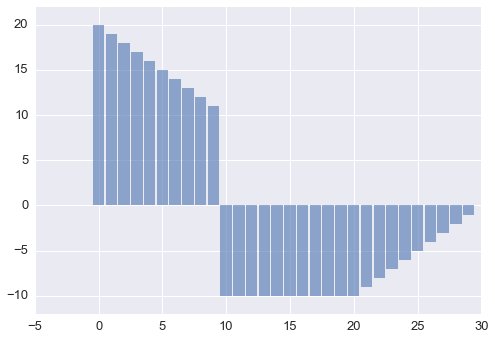

In [45]:
(hist1 - hist2).plot(ylim=(-12, 22))

In [46]:
H_first = st.Hist(full_term.prglngth[full_term.birthord == 1], label='1st born')
H_other = st.Hist(full_term.prglngth[full_term.birthord != 1], label='other')

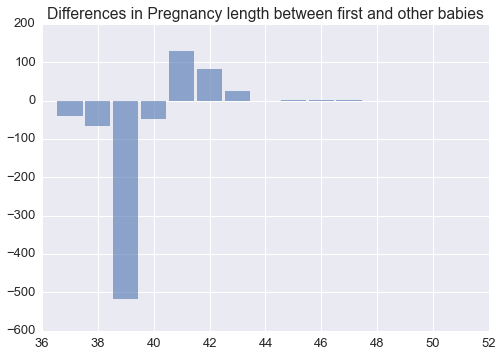

In [50]:
(H_first - H_other).plot(title = 'Differences in Pregnancy length between first and other babies')